<a href="https://colab.research.google.com/github/stp511/sales_prediction1/blob/main/Project1_FinalPart_Sales_Predictions_Steven_Phillips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1 - Final Part of Sales Predictions Project using Machine Learning**
- **Steven Phillips**
- 10/21/2022

## Import all libraries

In [128]:
#import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
set_config(display='diagram')

## Load, copy, and explore the Sales Predictions data set

In [69]:
#mount data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
#Load the data for Sales Predictions csv file as a data frame and present the first five rows
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


We will make a copy of original df to avoid any manipulations

In [71]:
# copy of df named df_ml
df_ml = df.copy()

In [72]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [73]:
df_ml.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [74]:
df_ml.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [75]:
# Check to see if there are any duplicates
df_ml.duplicated().sum()

0

Check for inconsistencies within categorial data

In [76]:
#check for inconsistencies 'Item_Identifier' [none]
df_ml['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [77]:
#check for inconsistencies 'Item_Fat_Content'
df_ml['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [78]:
#Within Item_Fat_Content replace reg with Regular and Lf/low fat with Low Fat and confirm
df_ml['Item_Fat_Content'].replace(['LF', 'low fat'], ['Low Fat', 'Low Fat'], inplace=True)
df_ml['Item_Fat_Content'].replace(['reg'], ['Regular'], inplace=True)
df_ml['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [79]:
#check for inconsistencies 'Item_Type' [none]
df_ml['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [80]:
#check for inconsistencies 'Outlet_Identifier' [none]
df_ml['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [81]:
#check for inconsistencies 'Outlet_Size' [none]
df_ml['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [82]:
#check for inconsistencies 'Outlet_Location_Type' [none]
df_ml['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [83]:
#check for inconsistencies 'Outlet_Type' [none]
df_ml['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Outlet_Size and Outlet_Location_Type are ordinal categorical features.

## Split the data (X, y and train/test) (Validation Split)

In [84]:
# The target vector y is Item_Outlet_Sales, split X and y, dropping unnecessary features
X = df_ml.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year' ])
y = df_ml['Item_Outlet_Sales']

In [85]:
# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Instantiate Transformers

In [86]:
#instantiate the StandardScaler, OneHotEncoder, OrdinalEncoder and Imputers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [87]:
#create a list of ordinal labels, in order of least to most

outlet_size_labels = ['Small', 'Medium', 'High']
outlet_location_type_labels = ['Tier 1', 'Tier 2', 'Tier 3']

#combine the ordered list in the order that the columns appear
ordered_labels = [outlet_size_labels, outlet_location_type_labels]
 
ordinal = OrdinalEncoder(categories = ordered_labels)

## Create a Pipeline for Numeric Data and a Pipeline for Categorical Data

In [88]:
# Setup the pipelines for the numeric and categorical data

num_pipeline = make_pipeline(mean_imputer, scaler)
ord_pipeline = make_pipeline(freq_imputer, ordinal)
nom_pipeline = make_pipeline(freq_imputer, ohe)

## Create Tuples to Pair Pipelines with Columns

In [89]:
# Create column lists for objects and a number selector
ordinal_cols = ['Outlet_Size', 'Outlet_Location_Type']
nominal_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Type']

num_selector = make_column_selector(dtype_include='number')

# Setup the tuples to pair the processors with the column selectors

numeric_tuple = (num_pipeline, num_selector)
ordinal_tuple = (ord_pipeline, ordinal_cols)
nominal_tuple = (nom_pipeline, nominal_cols)

## Create the Column Transformer to Apply Different Preprocessing to Different Columns

In [90]:
# Instantiate the column transformer

preprocessor = make_column_transformer(ordinal_tuple, 
                                          numeric_tuple, 
                                          nominal_tuple, 
                                          remainder='drop')

## Fit the Column Transformer on the Training Data

In [91]:
# Fit the column transformer on the X_train

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3']]))]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7901837cd0>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Type'])])

## Transform Both the Training and Testing Data

In [92]:
# Transform the X_train data and the X_test data

X_train_transformed = preprocessor.transform(X_train)

X_test_transformed = preprocessor.transform(X_test)

## Display the Results

In [93]:
X_train_transformed

array([[ 1.        ,  2.        ,  0.81724868, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  2.        ,  0.5563395 , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  0.        , -0.13151196, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  1.        ,  1.11373638, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        ,  1.76600931, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.81724868, ...,  1.        ,
         0.        ,  0.        ]])

## **Comparison of Two Models:**

The following function provides the evaluation metrics for any model:

In [94]:
def eval_regression(true, pred):
  """Takes true and predicted values (arrays) and prints MAE, MSE, RMSE and R2"""
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae},\n MSE {mse},\n RMSE: {rmse},\n R^2: {r2} ')

## Linear Regression Model to Predict Sales

Here we instantiate and fit the model, also using the preprocessor from above:

In [95]:
# instantiate a linear regression model
lin_reg = LinearRegression()

# create linear regression model pipeline
lr_pipe = make_pipeline(preprocessor, lin_reg)

# fit on the training data
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']]))]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer...
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7901837cd0>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Type'])])),
                ('linearregression', LinearRegression())])

In [96]:
# predictions of the training and testing data created using linear regression model
train_pred_lr = lr_pipe.predict(X_train)
test_pred_lr = lr_pipe.predict(X_test)

In [97]:
# find MAE, MSE, RMSE and R2 on the linear regression model for the training data
eval_regression(y_train, train_pred_lr)

MAE 847.4260723873593,
 MSE 1300474.7736749046,
 RMSE: 1140.3836081226812,
 R^2: 0.5605696102544135 


In [98]:
# find MAE, MSE, RMSE and R2 on the linear regression model for the test data
eval_regression(y_test, test_pred_lr)

MAE 805.3907843735335,
 MSE 1197696.132326376,
 RMSE: 1094.3930428901565,
 R^2: 0.5658912678913257 


**The metrics for evaluation of our Linear Regression Model on our test data are: Mean Absolute Error(MAE) 805.39, Mean Squared Error(MSE) 1,197,696.13, and Root Mean Squared Errer(RMSE) 1,094.39.  The R2 value explaining the variability in our target data is 0.5659.**

## Regression Tree Model to Predict Sales

Here the Decision Tree Model is created with default hyperparameter values:

In [99]:
## Make and fit model
dec_tree = DecisionTreeRegressor(random_state = 42)

# create decision tree model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']]))]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7901837cd0>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Type'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [100]:
# Make Predictions using the model
dec_tree_train_preds = dec_tree_pipe.predict(X_train)
dec_tree_test_preds = dec_tree_pipe.predict(X_test)

Here are the resulting metrics on the train and test data for our model:

In [101]:
# find MAE, MSE, RMSE and R2 on the decision tree model for the training data
eval_regression(y_train, dec_tree_train_preds)

MAE 1.6007220580327663e-16,
 MSE 3.0330171474830394e-29,
 RMSE: 5.50728349323243e-15,
 R^2: 1.0 


In [102]:
# find MAE, MSE, RMSE and R2 on the decision tree model for the test data
eval_regression(y_test, dec_tree_test_preds)

MAE 1062.5518134209292,
 MSE 2363743.145677713,
 RMSE: 1537.446957028994,
 R^2: 0.14325385854957384 


In [103]:
# What was the depth of our default tree?
dec_tree.get_depth()

42

The model with a depth of 42 is quite overfitted, a very high R2 value on the training data of 1.0 and a very poor R2 value of 0.1433 on the test data, and we will tune the depth to optimize performance.

Here we will tune the hyperparamter 'max_depth':

In [123]:
# List of values to try for max_depth:
depths = list(range(2, 42)) # will try every value between 2 and 42

In [105]:
# create a dataframe to store train and test R2 scores.
scores = pd.DataFrame(columns=['Train','Test'], index=depths)

In [124]:
# this loop will create metrics for each depth between 2 and 42
for depth in depths:
    # fit a new model with the depth
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    #fit the model
    dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
    dec_tree_pipe.fit(X_train, y_train)
    # create prediction arrays
    dt_train_preds = dec_tree_pipe.predict(X_train)
    dt_test_preds = dec_tree_pipe.predict(X_test)
    current_depth = dec_tree.get_depth()
    print(f'\nCurrent depth metrics: {current_depth},\n')
    eval_regression(y_test, dt_test_preds)
    # evaluate the model using R2 score
    train_r2 = r2_score(y_train, dt_train_preds)
    test_r2 = r2_score(y_test, dt_test_preds)
    # store the scores in a dataframe
    scores.loc[depth, 'Train'] = train_r2
    scores.loc[depth, 'Test'] = test_r2


Current depth metrics: 2,

MAE 904.9816223664748,
 MSE 1562195.0050104978,
 RMSE: 1249.8779960502136,
 R^2: 0.4337775044707167 

Current depth metrics: 3,

MAE 810.0469764375893,
 MSE 1312661.077522819,
 RMSE: 1145.7142215765757,
 R^2: 0.5242218617296539 

Current depth metrics: 4,

MAE 750.1611092907328,
 MSE 1147721.1352093078,
 RMSE: 1071.3174763856453,
 R^2: 0.5840048628592631 

Current depth metrics: 5,

MAE 738.3173097797824,
 MSE 1118185.973077762,
 RMSE: 1057.4431299496734,
 R^2: 0.5947099753159972 

Current depth metrics: 6,

MAE 741.8150721590573,
 MSE 1152126.084216121,
 RMSE: 1073.371363609129,
 R^2: 0.5824082752301147 

Current depth metrics: 7,

MAE 748.9600968694648,
 MSE 1161982.9929505335,
 RMSE: 1077.9531497011053,
 R^2: 0.5788356076413037 

Current depth metrics: 8,

MAE 758.9589538779821,
 MSE 1198908.7913080666,
 RMSE: 1094.9469353845723,
 R^2: 0.5654517358273794 

Current depth metrics: 9,

MAE 766.5696153098345,
 MSE 1226787.7485772339,
 RMSE: 1107.6045090993598

Here is a visual plot comparing the train and test R2 score for each depth:

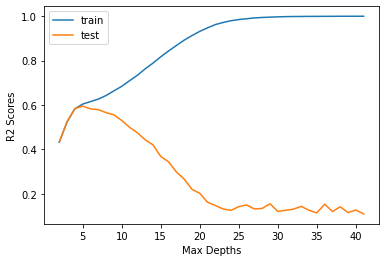

In [125]:
#plot the R2 scores to visually determine the best max_depth
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [126]:
# sort the dataframe by test R2 scores and save the index (k) of the best score
scores.sort_values(by='Test', ascending=False)

,Train,Test
5,0.60394,0.59471
4,0.582625,0.584005
6,0.615072,0.582408
7,0.626453,0.578836
8,0.642724,0.565452
9,0.663609,0.555347
10,0.684022,0.530039
3,0.524218,0.524222
11,0.709235,0.499261
12,0.733642,0.474979


In [114]:
# print the best score
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

5

### The depth of 5 maximizes the R2 score on the test data and will be used now to create our optimal Decision Tree Model:

In [119]:
## Make and fit model
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)

# create decision tree model pipeline
dec_tree_5_pipe = make_pipeline(preprocessor, dec_tree_5)

dec_tree_5_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']]))]),
                                                  ['Outlet_Size',
                                                   'Outlet_Location_Type']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7901837cd0>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Type'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [120]:
# Make Predictions using the tuned Decision Tree model
dec_tree_5_train_preds = dec_tree_5_pipe.predict(X_train)
dec_tree_5_test_preds = dec_tree_5_pipe.predict(X_test)

In [121]:
# find MAE, MSE, RMSE and R2 on the decision tree model for the training data
eval_regression(y_train, dec_tree_5_train_preds)

MAE 762.6101695559578,
 MSE 1172122.7729098853,
 RMSE: 1082.6461900869947,
 R^2: 0.6039397477322956 


In [122]:
# find MAE, MSE, RMSE and R2 on the decision tree model for the test data
eval_regression(y_test, dec_tree_5_test_preds)

MAE 738.3173097797824,
 MSE 1118185.973077762,
 RMSE: 1057.4431299496734,
 R^2: 0.5947099753159972 


**The metrics for evaluation of our optimized Decision Tree Model of depth 5 on our test data are: Mean Absolute Error(MAE) 738.32 [a decrease in MAE from 805.39 in our Linear Regression (LR) Model, Mean Squared Error(MSE) 1,118,185.97, and Root Mean Squared Errer(RMSE) of 1,057.44 [a decrease in RMSE from our LR Model of 1,094.39]. The R2 value explaining the variability in our target data is 0.5947 [an increase in R2 from our LR model of 0.5659].**

## **Model Recommendation**
- The overall model recommendation is to use the Decision Tree Model with tuning the hyperparameter depth to 5.
- There is an increase in the explanation in variability of the target values with an R2 score of 0.5947 for this model, higher than the 0.5659 score from the Linear Regression model.
- Both the MAE and RMSE metrics were decreased with this model in comparison to the Linear Regression model, with values showing this decrease provided above.